#What is Pandas?
Pandas is a Python library used for working with data sets.

It has functions for ***analyzing, cleaning, exploring, and manipulating data***.

The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008.

#Advantages 
* Fast and efficient for manipulating and analyzing data.

* Data from different file objects can be loaded.

* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data

* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects

* Data set merging and joining.

* Flexible reshaping and pivoting of data sets

* Provides time-series functionality (time-based indexing).

* Powerful group by functionality for performing split-apply-combine operations on data sets.





# Installation
* pip install pandas

In [1]:
import pandas as pd

Pandas generally provide two data structures for manipulating data, They are: 

* Series
* DataFrame

***Series***: Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.).  The axis labels are collectively called indexes. Pandas Series is nothing but a column in an excel sheet. 

***Pandas DataFrame*** is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).

#Series
A Series is a one-dimensional array-like object containing an array of data (of any
NumPy data type) and an associated array of data labels, called its ***index***. The simplest
Series is formed from only an array of data:

In [4]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [5]:
obj.values

array([ 4,  7, -5,  3])

In [6]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c']) #create own index
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [10]:
obj2[2]

-5

In [11]:
obj2['a']

-5

In [12]:
obj2[obj2 > 0]  #list of data items greater than 0

d    4
b    7
c    3
dtype: int64

In [13]:
obj2 * 2 # we can do arithematic operations on series

d     8
b    14
a   -10
c     6
dtype: int64

In [18]:
'b' in obj2 # index checking

True

 # create a Series

In [20]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [23]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 #sdata were placed in the appropriate locations, but since no value for 'California' was found, it appears as NaN (not a number)

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [25]:
pd.isnull(obj4) # missing data 

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

# DataFrame
A DataFrame represents a tabular, spreadsheet-like data structure containing an ordered collection of columns, each of which can be a different value type (numeric,
string, boolean, etc.). The DataFrame has both a row and column index;
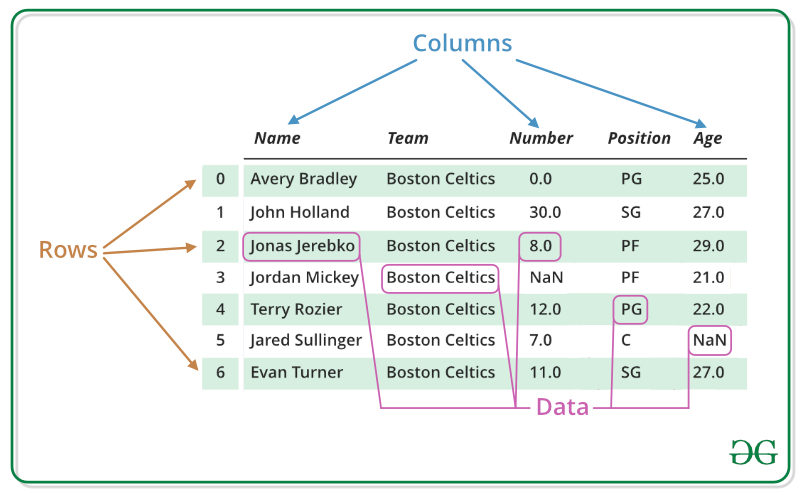

In [27]:
# Create a dataframe from dict of equal-length lists
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = pd.DataFrame(data)
frame

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9

In [30]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five'])
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN

In [32]:
frame2['state'] # retrive the data in coloumn index

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [37]:
frame2.loc['two'] # retrive the data in row index

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: two, dtype: object

In [39]:
frame2['debt'] = 16.5
frame2

year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5

In [42]:
import numpy as np
frame2['debt'] = np.arange(5.)
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0

In [44]:
frame2.T  #transpose of a df

one   two three    four    five
year   2000  2001  2002    2001    2002
state  Ohio  Ohio  Ohio  Nevada  Nevada
pop     1.5   1.7   3.6     2.4     2.9
debt    0.0   1.0   2.0     3.0     4.0

In [46]:
frame2.index #pandas’s Index objects are responsible for holding the axis labels and other metadata (like the axis name or names)

Index(['one', 'two', 'three', 'four', 'five'], dtype='object')

# Essential Functionality
* Reindexing
* Dropping entries from an axis
* Indexing, selection, and filtering
* Arithmetic and data alignment
* Sorting and ranking

#Reindexing
A critical method on pandas objects is reindex, which means to create a new object
with the data conformed to a new index

In [51]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
print(obj)
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
print(obj2)
# rearranges the data according to the new index, introducing missing values if any index values were not already present

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64


In [54]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],columns=['Ohio', 'Texas', 'California'])
frame

Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8

In [55]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0

#Dropping entries from an axis
Dropping one or more entries from an axis is easy if you have an index array or list
without those entries. 

In [56]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])   # series
print(obj)
new_obj = obj.drop('c')
print(new_obj)

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64
a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64


In [58]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'New York'],columns=['one', 'two', 'three', 'four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [61]:
data1=data.drop(['Colorado', 'Ohio'])
print(data1)

          one  two  three  four
Utah        8    9     10    11
New York   12   13     14    15


In [62]:
data2=data.drop('two', axis=1)
print(data2)

          one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15


# Indexing, selection, and filtering

In [67]:
# Serie data
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
print(obj)
print(obj['b'])
print('data at index 1')
print(obj[1])
print('from index 1 to 4')
print(obj[1:4])

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64
1.0
data at index 1
1.0
from index 1 to 4
b    1.0
c    2.0
d    3.0
dtype: float64


In [68]:
# Data farame
data = pd.DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'New York'],columns=['one', 'two', 'three', 'four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [84]:
print(data['two'])
print(data[:2])

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7


In [88]:
# .loc is primarily label based
# .iloc is primarily integer position based (from 0 to length-1 of the axis)
print(data)
print(data.loc[:, ['two']])
print(data.iloc[1:4])

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
          two
Ohio        1
Colorado    5
Utah        9
New York   13
          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


# Arithmetic and data alignment
One of the most important pandas features is the behavior of arithmetic between objects with different indexes.

In [94]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
print(s1)
print(s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


In [95]:
print(s1+s2)

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


In [96]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df1)
print(df2)

            b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0
          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0


In [97]:
print(df1+df2)

            b   c     d   e
Colorado  NaN NaN   NaN NaN
Ohio      3.0 NaN   6.0 NaN
Oregon    NaN NaN   NaN NaN
Texas     9.0 NaN  12.0 NaN
Utah      NaN NaN   NaN NaN


# Sorting and ranking
Sorting a data set by some criterion is another important built-in operation. To sort
lexicographically by row or column index, use the sort_index method, which returns
a new, sorted object:

In [99]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
print(obj)
print(obj.sort_index())

d    0
a    1
b    2
c    3
dtype: int64
a    1
b    2
c    3
d    0
dtype: int64


In [101]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],columns=['d', 'a', 'b', 'c'])
print(frame)
print("sorting in axis '0'")
print(frame.sort_index())
print("sorting in axis '1'")
print(frame.sort_index(axis=1))

       d  a  b  c
three  0  1  2  3
one    4  5  6  7
sorting in axis '0'
       d  a  b  c
one    4  5  6  7
three  0  1  2  3
sorting in axis '1'
       a  b  c  d
three  1  2  3  0
one    5  6  7  4


In [102]:
frame.sort_index(axis=1, ascending=False)

d  c  b  a
three  0  3  2  1
one    4  7  6  5

In [105]:
#Series by its values
obj = pd.Series([4, 7, -3, 2])
print(obj.sort_values())

2   -3
3    2
0    4
1    7
dtype: int64


In [110]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

b  a
0  4  0
1  7  1
2 -3  0
3  2  1

In [111]:
print(frame.sort_values(by=['b']))
print(frame.sort_values(by=['a', 'b']))

   b  a
2 -3  0
3  2  1
0  4  0
1  7  1
   b  a
2 -3  0
0  4  0
3  2  1
1  7  1


# Summarizing and Computing Descriptive Statistics
pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of reductions or summary statistics, methods
that extract a single value (like the sum or mean) from a Series or a Series of values from
the rows or columns of a DataFrame. 

In [112]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],[np.nan, np.nan], [0.75, -1.3]],index=['a', 'b', 'c', 'd'],columns=['one', 'two'])
print(df)

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3


In [115]:
#sum
print(df.sum())
print(df.sum(axis=1))

one    9.25
two   -5.80
dtype: float64
a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64


In [119]:
#Mean
print(df)
df.mean(axis=1, skipna=False)

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3


a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [120]:
df.describe()

one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000